Sequential AVL Tree

Reference (Chinese): https://www.cnblogs.com/skywang12345/p/3576969.html

TODO List:
1. fixHeight after ~~rotate~~/~~insert~~ /remove
2. implement remove

In [1]:
from pyAVL import *

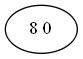

Tree is empty!


In [2]:
tree = AVL()
tree.put(8)
tree.print()
tree.remove(8)
tree.print()
# tree.put(8)
# tree.put(4)
# tree.print()
# tree.put(12)
# tree.print()
# tree.put(2)
# tree.print()
# tree.put(6)
# tree.print()
# tree.put(1)
# tree.print()
# tree.remove(4)
# tree.print()
# tree.remove(6)
# tree.print()


In [3]:
rt = AVL()
for i in range(1,20):
    rt.put(i)
    
